In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train = pd.read_csv("TRAIN.csv")
test = pd.read_csv("TEST.csv")

In [ ]:
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,350957,Male,50,1,41,0,1-2 Year,Yes,35915,124,240,0
1,239788,Female,48,1,28,0,1-2 Year,Yes,26873,124,274,0
2,348272,Female,34,1,41,0,1-2 Year,Yes,2630,156,138,1
3,73940,Female,43,1,28,0,1-2 Year,Yes,46877,124,223,0
4,292871,Male,29,1,28,1,< 1 Year,No,38009,152,106,0


In [ ]:
train.drop('id',inplace = True, axis = 1)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


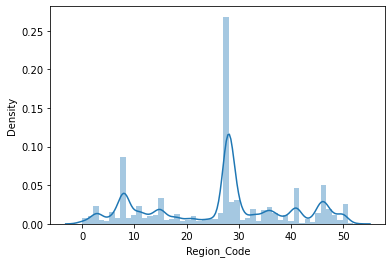

In [ ]:
sns.distplot(train.Region_Code)

In [ ]:
train['Vehicle_Age_Damage'] = train['Vehicle_Age'] + '_' + train['Vehicle_Damage']

In [ ]:
train.isnull().sum()

Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
Vehicle_Age_Damage      0
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()
train['Vehicle_Age'] = le.fit_transform(train['Vehicle_Age'])
train['Gender'] = le.fit_transform(train['Gender'])
train['Vehicle_Damage'] = le.fit_transform(train['Vehicle_Damage'])
train['Vehicle_Age_Damage'] = le.fit_transform(train['Vehicle_Age_Damage'])

In [ ]:
vintage_bins = [0,30,60,90,120,150,180,210,240,270,300]
vintage_labels = [1,2,3,4,5,6,7,8,9,10]
train["_Vintage"] = pd.cut(train["Vintage"], bins = vintage_bins, labels = vintage_labels)

age_bins = [0,20,30,40,50,60,70,80,90]
age_labels = [1,2,3,4,5,6,7,8]
train["_Age"] = pd.cut(train["Age"], bins = age_bins, labels = age_labels)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

selected_cols = [ "Annual_Premium"]

normalize = MinMaxScaler(feature_range = (0, 1))

for col in selected_cols:
    train[col] = normalize.fit_transform(train[[col]])

In [ ]:
train.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_Damage,_Vintage,_Age
0,1,50,1,41,0,0,1,0.061922,124,240,0,1,8,4
1,0,48,1,28,0,0,1,0.045100,124,274,0,1,10,4
2,0,34,1,41,0,0,1,0.000000,156,138,1,1,5,3
3,0,43,1,28,0,0,1,0.082315,124,223,0,1,8,4
4,1,29,1,28,1,1,0,0.065817,152,106,0,2,4,2


In [ ]:
test.drop('id',inplace = True, axis = 1)

In [ ]:
test['Vehicle_Age_Damage'] = test['Vehicle_Age'] + '_' + test['Vehicle_Damage']
test['Vehicle_Age_Damage'] = le.fit_transform(test['Vehicle_Age_Damage'])

In [ ]:
test['Gender'] = le.fit_transform(test['Gender'])
test['Vehicle_Age'] = le.fit_transform(test['Vehicle_Age'])
test['Vehicle_Damage'] = le.fit_transform(test['Vehicle_Damage'])

In [ ]:
vintage_bins = [0,30,60,90,120,150,180,210,240,270,300]
vintage_labels = [1,2,3,4,5,6,7,8,9,10]
test["_Vintage"] = pd.cut(test["Vintage"], bins = vintage_bins, labels = vintage_labels)

age_bins = [0,20,30,40,50,60,70,80,90]
age_labels = [1,2,3,4,5,6,7,8]
test["_Age"] = pd.cut(test["Age"], bins = age_bins, labels = age_labels)

In [ ]:
selected_cols = [ "Annual_Premium"]

normalize = MinMaxScaler(feature_range = (0, 1))

for col in selected_cols:
    test[col] = normalize.fit_transform(test[[col]])

In [ ]:
test.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Vehicle_Age_Damage,_Vintage,_Age
0,1,31,1,18,0,0,1,0.000000,156,152,1,6,3
1,0,24,1,15,1,1,0,0.054270,152,267,2,9,2
2,0,25,1,14,1,1,0,0.056820,152,139,2,5,2
3,1,49,1,28,0,0,1,0.054807,26,12,1,1,4
4,1,55,1,45,0,0,1,0.065311,26,44,1,2,5


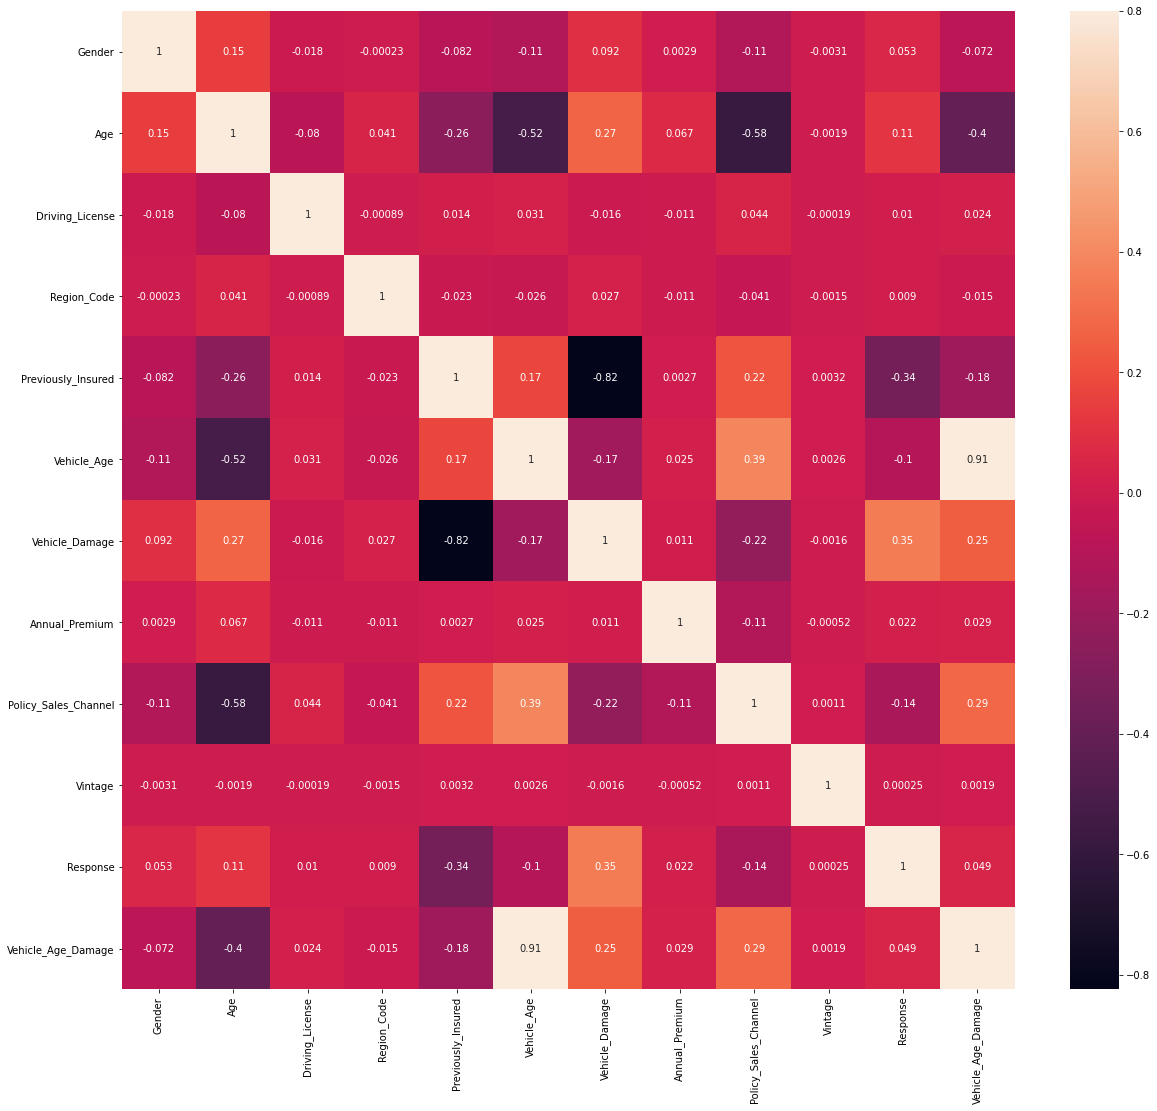

In [ ]:
corr_matrix = train.corr()
f , ax = plt.subplots(figsize=(20,18))
sns.heatmap(corr_matrix,vmax=0.8, annot=True)

In [ ]:
import statsmodels.api as sm 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
Xtrain = train[['Gender',	'Age','Driving_License','Region_Code','Previously_Insured',	'Vehicle_Age','Vehicle_Damage','Annual_Premium','Policy_Sales_Channel',	'Vintage','Vehicle_Age_Damage',	'_Vintage',	'_Age']] 
ytrain = train[['Response']] 

In [ ]:
log_reg = sm.Logit(ytrain, Xtrain).fit()

In [ ]:
print(log_reg.summary2())

In [ ]:
Xtrain1 = train[['Gender',	'Age','Driving_License','Region_Code','Previously_Insured',	'Vehicle_Age','Vehicle_Damage','Annual_Premium','Policy_Sales_Channel',	'Vintage',	'_Vintage',	'_Age']] 
ytrain1 = train[['Response']] 

In [ ]:
log_reg1 = sm.Logit(ytrain1, Xtrain1).fit()

In [ ]:
print(log_reg1.summary())

In [ ]:
print(log_reg1.summary2())

In [ ]:
Xtrain2 = train[['Gender',	'Age','Driving_License','Region_Code','Previously_Insured',	'Vehicle_Age','Vehicle_Damage','Policy_Sales_Channel',	'Vintage',	'_Vintage']] 
ytrain2 = train[['Response']] 

In [ ]:
log_reg2 = sm.Logit(ytrain2, Xtrain2).fit()

In [ ]:
print(log_reg2.summary2())

In [ ]:
X = train[['Gender',	'Age','Driving_License','Region_Code','Previously_Insured',	'Vehicle_Age','Vehicle_Damage','Policy_Sales_Channel',	'Vintage',	'_Vintage']] 
Y = train[['Response']] 

In [ ]:
test = test[['Gender',	'Age','Driving_License','Region_Code','Previously_Insured',	'Vehicle_Age','Vehicle_Damage','Policy_Sales_Channel',	'Vintage',	'_Vintage']] 

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size= 0.25, random_state=42,stratify=Y,shuffle=True)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.model_selection import RandomizedSearchCV
target = 'Response'
predictors = [x for x in train.columns if x not in [target]]
param_test1 = {'n_estimators':range(20,81,10)}
gsearch1 = RandomizedSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=500,min_samples_leaf=50,max_depth=8,max_features='sqrt',subsample=0.8,random_state=10), 
param_distributions = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(X,Y)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 7 is smaller than n_iter=10. Running 7 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                        criterion='friedman_mse',
                                                        init=None,
                                                        learning_rate=0.1,
                                                        loss='deviance',
                                                        max_depth=8,
                                                        max_features='sqrt',
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=50,
                                                        min_samples_split=500,
                                               

In [ ]:
gsearch1.best_params_

{'n_estimators': 80}

In [31]:
param_test2 = {'max_depth':range(5,16,2), 'min_samples_split':range(200,1001,200)}
gsearch2 = RandomizedSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=60, max_features='sqrt', subsample=0.8, random_state=10), 
param_distributions = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch2.fit(X,Y)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                        criterion='friedman_mse',
                                                        init=None,
                                                        learning_rate=0.1,
                                                        loss='deviance',
                                                        max_depth=3,
                                                        max_features='sqrt',
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                  

In [32]:
gsearch2.best_params_

{'max_depth': 9, 'min_samples_split': 1000}

In [34]:
param_test3 = {'min_samples_split':range(1000,2100,200), 'min_samples_leaf':range(30,71,10)}
gsearch3 = RandomizedSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=60,max_depth=9,max_features='sqrt', subsample=0.8, random_state=10), 
param_distributions = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch3.fit(X,Y)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                        criterion='friedman_mse',
                                                        init=None,
                                                        learning_rate=0.1,
                                                        loss='deviance',
                                                        max_depth=9,
                                                        max_features='sqrt',
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                  

In [35]:
gsearch3.best_params_

{'min_samples_leaf': 40, 'min_samples_split': 1200}

In [36]:
param_test4 = {'max_features':range(7,20,2)}
gsearch4 = RandomizedSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=60,max_depth=9, min_samples_split=1200, min_samples_leaf=60, subsample=0.8, random_state=10),
param_distributions = param_test4, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch4.fit(X,Y)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 7 is smaller than n_iter=10. Running 7 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                        criterion='friedman_mse',
                                                        init=None,
                                                        learning_rate=0.1,
                                                        loss='deviance',
                                                        max_depth=9,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=60,
                                                        min_samples_split=1200,
                                                

In [37]:
gsearch4.best_params_

{'max_features': 9}

In [38]:
gb = GradientBoostingClassifier(n_estimators = 80,learning_rate=0.1, min_samples_split=500,min_samples_leaf=50,max_depth=8,max_features='sqrt',subsample=0.8,random_state=10)

In [39]:
gb1 = GradientBoostingClassifier(max_depth = 9, min_samples_split = 1000,learning_rate=0.1, n_estimators=60, max_features='sqrt', subsample=0.8, random_state=10)

In [40]:
gb2 = GradientBoostingClassifier(min_samples_leaf = 40, min_samples_split= 1200,learning_rate=0.1, n_estimators=60,max_depth=9,max_features='sqrt', subsample=0.8, random_state=10)

In [41]:
gb3 =  GradientBoostingClassifier(max_features=  9,learning_rate=0.1, n_estimators=60,max_depth=9, min_samples_split=1200, min_samples_leaf=60, subsample=0.8, random_state=10)

In [46]:
gb.fit(X,Y)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=50, min_samples_split=500,
                           min_weight_fraction_leaf=0.0, n_estimators=80,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=10, subsample=0.8, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [42]:
gb1.fit(X,Y)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=9,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=60,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=10, subsample=0.8, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [43]:
gb2.fit(X,Y)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=9,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=40, min_samples_split=1200,
                           min_weight_fraction_leaf=0.0, n_estimators=60,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=10, subsample=0.8, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [44]:
gb3.fit(X,Y)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=9,
                           max_features=9, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1200,
                           min_weight_fraction_leaf=0.0, n_estimators=60,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=10, subsample=0.8, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [47]:
y1 = gb.predict(test)

In [48]:
y2 = gb1.predict(test)

In [49]:
y3 = gb2.predict(test)

In [50]:
y4 = gb3.predict(test)

In [54]:
output = pd.DataFrame({'Response': y4})
output.to_csv('gb3.csv', index=False)

In [55]:
from sklearn.ensemble import VotingClassifier

In [56]:
estimator = []  
estimator.append(('gb', gb))
estimator.append(('gb1', gb1))
estimator.append(('gb2', gb2))
estimator.append(('gb3', gb3))

In [57]:
vot_hard = VotingClassifier(estimators = estimator, voting ='hard')

In [58]:
vot_hard.fit(X,Y) 

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


VotingClassifier(estimators=[('gb',
                              GradientBoostingClassifier(ccp_alpha=0.0,
                                                         criterion='friedman_mse',
                                                         init=None,
                                                         learning_rate=0.1,
                                                         loss='deviance',
                                                         max_depth=8,
                                                         max_features='sqrt',
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=50,
                                                         min_samples_split=500,
                                         

In [59]:
gbmvot = vot_hard.predict(test)

In [60]:
output = pd.DataFrame({'Response': gbmvot})
output.to_csv('gbmvothard.csv', index=False)

In [85]:
e = []  
e.append(('gb1', gb1))
e.append(('gb2', gb2))

In [86]:
vot_h = VotingClassifier(estimators = e, voting ='hard')

In [87]:
vot_h.fit(X,Y) 

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


VotingClassifier(estimators=[('gb1',
                              GradientBoostingClassifier(ccp_alpha=0.0,
                                                         criterion='friedman_mse',
                                                         init=None,
                                                         learning_rate=0.1,
                                                         loss='deviance',
                                                         max_depth=9,
                                                         max_features='sqrt',
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=1000,
                                        

In [88]:
gbmh = vot_h.predict(test)

In [89]:
output = pd.DataFrame({'Response': gbmh})
output.to_csv('gbmh.csv', index=False)